# 1. Import libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os
import numpy as np
from sklearn.linear_model import LinearRegression

# 2. Change the working directory 

In [2]:
os.chdir('/Users/neda/Dropbox (PopGen)/tmp/egg_size_method_paper/scripts/')
os.getcwd()

'/Users/neda/Dropbox (PopGen)/tmp/egg_size_method_paper/scripts'


# 3. Using the reference beads to convert time of flight (TOF) to size μm

## 3.1 Read Biosorter data 

### We first read the Biosorter data for runs of 200 and 430 um beads. Note that for these bead the original Biosorter data is copied to an Excel file.


In [3]:
bead_200 = pd.read_excel('../data/Drosophila_eggs_OD1_5_1xPBS_26-03-2021/Ref_bead_26-03-2021.xlsx', sheet_name='200 um Beads')
bead_430 = pd.read_excel('../data/Drosophila_eggs_OD1_5_1xPBS_26-03-2021/Ref_bead_26-03-2021.xlsx', sheet_name='430 um Beads')

### Check the size distribution of 200 μm and 430 μm beads

Text(0, 0.5, 'Count')

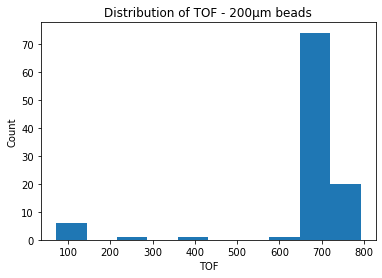

In [4]:
plt.title('Distribution of TOF - 200μm beads')
plt.hist(bead_200['TOF'])
plt.xlabel('TOF')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

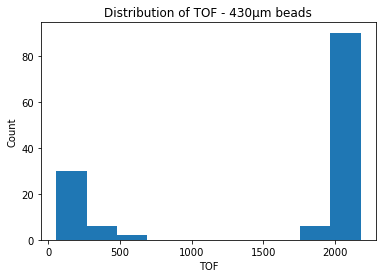

In [5]:
plt.title('Distribution of TOF - 430μm beads')
plt.hist(bead_430['TOF'])
plt.xlabel('TOF')
plt.ylabel('Count')

### Check the median TOF for 200 μm and 430 μm beads

In [6]:
print(np.median(bead_200['TOF']))
print(np.median(bead_430['TOF']))

688.0
2040.0


## 3.2 Remove outliers

### The median TOF of 200 μm and 430 μm beads is 688 and 2040 respectively, some outliers are present too. So, we remove the outliers and have a look at the distribution again.

Text(0, 0.5, 'Count')

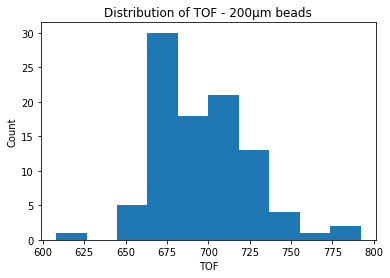

In [7]:
plt.title('Distribution of TOF - 200μm beads')
bead_200_flt = bead_200[bead_200['TOF'] > 600]
plt.hist(bead_200_flt['TOF'])
plt.xlabel('TOF')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

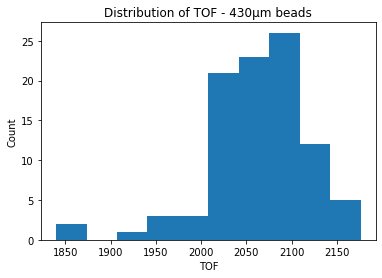

In [8]:
plt.title('Distribution of TOF - 430μm beads')
bead_430_flt = bead_430[bead_430['TOF'] > 1800]
plt.hist(bead_430_flt['TOF'])
plt.xlabel('TOF')
plt.ylabel('Count')

### The final size distribution and mean/median of reference beads

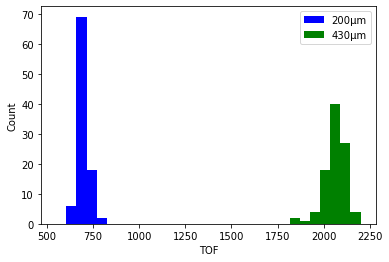

In [9]:
plt.hist(bead_200_flt['TOF'], color = 'blue', range=(550,2200), bins= 30, label='200μm') 
plt.hist(bead_430_flt['TOF'],color = 'green', range=(550,2200), bins= 30, label = '430μm') 
plt.xlabel('TOF')
plt.ylabel('Count')
plt.legend()

In [10]:
print('median bead 200 μm:', np.median(bead_200_flt['TOF']))
print('mean bead 200 μm:', np.mean(bead_200_flt['TOF']))
print('median bead 430 μm:', np.median(bead_430_flt['TOF']))
print('mean bead 430 μm:', np.mean(bead_430_flt['TOF']))

median bead 200 μm: 696.0
mean bead 200 μm: 696.3368421052631
median bead 430 μm: 2072.0
mean bead 430 μm: 2062.6666666666665


## 3.3 Fit a linear regression model

### We fit a linear regression model to the bead TOF data and use the the slope and intercept to convert TOF of all subsequent datasets to size (μm).

(191, 1)
(191,)
coefficient of determination: 0.9956030553606903
intercept: -491.77604881769616
slope: [5.94056445]


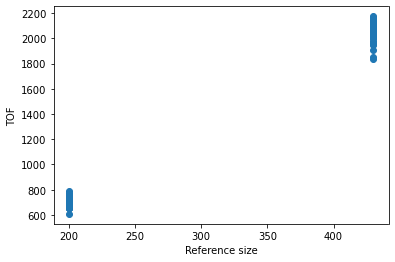

In [11]:
#first make a size array specifying the pre-defined size, the size of this array is equal to the length of bead dataset 
x = np.array([200]*95+ [430]*96).reshape((-1, 1))
print(x.shape)
#then convert TOF to arrays and plot the data
y = np.array(list(bead_200_flt['TOF'])+list(bead_430_flt['TOF']))
print(y.shape)
plt.scatter(x,y)
plt.xlabel('Reference size')
plt.ylabel('TOF')

##and finally fit the linear model
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)
intc =  model.intercept_

print('slope:', model.coef_)
sl=model.coef_[0]


## 3.4 Convert TOF to size (μm)

### We will use the the slope and intercept of the linear regression model to convert TOF to size (μm).

Text(0, 0.5, 'TOF')

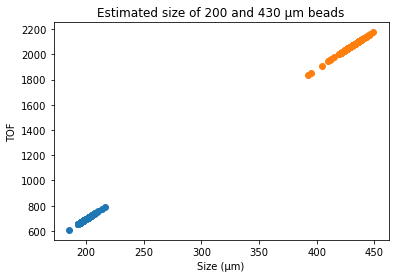

In [12]:
size_200 = (bead_200_flt['TOF'] - intc) / sl
size_430 = (bead_430_flt['TOF'] - intc) / sl

plt.title('Estimated size of 200 and 430 μm beads')
plt.scatter(size_200,bead_200_flt['TOF'])
plt.scatter(size_430,bead_430_flt['TOF'])
plt.xlabel('Size (μm)')
plt.ylabel('TOF')

## 3.5 **compute_append_size** function

### The computed slope and intercept of these reference beads will be used to convert TOF of all subsequent Biosorter runs to size. 

### In other scripts, the conversion of TOF to size using reference beads is done through function **compute_append_size**.